In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("OLYMP88_LDA.csv", delimiter=";")

In [5]:
df.head()

,r100m,salto_dist,arrem_peso,salto_alt,r400m,h110m,arrem_disco,salto_vara,dardo,r1500m,pontos,classe
0,11.25,7.43,15.48,2.27,48.90,15.13,49.28,4.7,61.32,268.95,8488,1
1,10.87,7.45,14.97,1.97,47.71,14.46,44.36,5.1,61.76,273.02,8399,1
2,11.18,7.44,14.20,1.97,48.29,14.81,43.66,5.2,64.16,263.20,8328,1
3,10.62,7.38,15.02,2.03,49.06,14.72,44.80,4.9,64.04,285.11,8306,1
4,11.02,7.43,12.92,1.97,47.44,14.40,41.20,5.2,57.46,256.64,8286,1


In [7]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.drop(columns=["classe"]).values

In [13]:
y = df["classe"].values

In [15]:
X[0:5]

array([[1.1250e+01, 7.4300e+00, 1.5480e+01, 2.2700e+00, 4.8900e+01,
        1.5130e+01, 4.9280e+01, 4.7000e+00, 6.1320e+01, 2.6895e+02,
        8.4880e+03],
       [1.0870e+01, 7.4500e+00, 1.4970e+01, 1.9700e+00, 4.7710e+01,
        1.4460e+01, 4.4360e+01, 5.1000e+00, 6.1760e+01, 2.7302e+02,
        8.3990e+03],
       [1.1180e+01, 7.4400e+00, 1.4200e+01, 1.9700e+00, 4.8290e+01,
        1.4810e+01, 4.3660e+01, 5.2000e+00, 6.4160e+01, 2.6320e+02,
        8.3280e+03],
       [1.0620e+01, 7.3800e+00, 1.5020e+01, 2.0300e+00, 4.9060e+01,
        1.4720e+01, 4.4800e+01, 4.9000e+00, 6.4040e+01, 2.8511e+02,
        8.3060e+03],
       [1.1020e+01, 7.4300e+00, 1.2920e+01, 1.9700e+00, 4.7440e+01,
        1.4400e+01, 4.1200e+01, 5.2000e+00, 5.7460e+01, 2.5664e+02,
        8.2860e+03]])

In [16]:
y[0:5]

array([1, 1, 1, 1, 1])

In [9]:
sc = StandardScaler()

In [17]:
X_std = sc.fit_transform(X)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_std)
var_exp = pca.explained_variance_ratio_

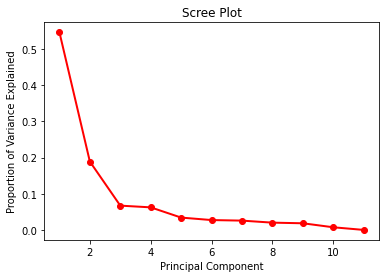

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/s6/4vg6xpzn2jqg0d3p8yymkgt40000gn/T/ipykernel_1471/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequence

Text(0, 0.5, 'PC 2')

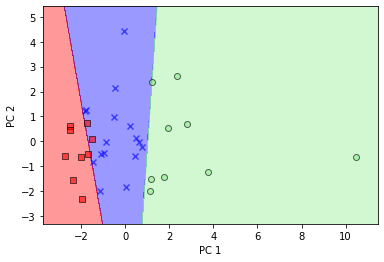

In [31]:
pca = PCA(n_components=2)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
X_pca = pca.fit_transform(X_std)
lr.fit(X_pca, y)

plot_decision_regions(X_pca, y, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_std, y)
lda.explained_variance_ratio_

array([0.93229024, 0.06770976])

In [38]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)
lr = LogisticRegression()
lr.fit(X_lda, y)

LogisticRegression()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/s6/4vg6xpzn2jqg0d3p8yymkgt40000gn/T/ipykernel_1471/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequence

Text(0, 0.5, 'LDA 2')

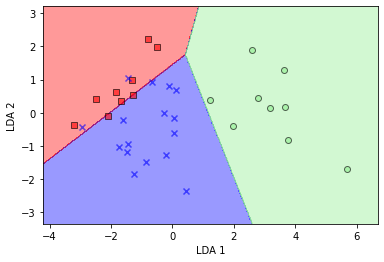

In [39]:
plot_decision_regions(X_lda, y, classifier=lr)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')